<a href="https://colab.research.google.com/github/Adjalma/Mini-Projeto-DNC/blob/main/Projeto_II_Futuro_dos_Dados_e_Aplica%C3%A7%C3%A3o_de_Big_Data_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

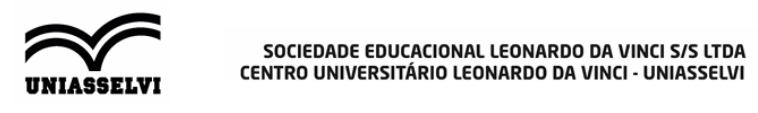

**Nome do Acadêmico:** Adjalma MAchado Aguiar Junior

**Matrícula:** 3315234

# Especificação de Imagens com Redes Neurais Convolucionais

 O nosso trabalho aqui é entender, de forma ilustrativa, como podemos passar uma imagem para um modelo de Inteligência Artificial e receber classificação.

Por exemplo o diagnóstico de exames de Raios-X é um ótimo tipo de classificação de imagem. Por exemplo, com a radiografia dos pulmões o médico pode identificar se o paciente possui ou não câncer. Um cientista de dados não tem o conhecimento médico, mas caso tenhamos uma grande base de dados com imagens de pulmões juntamente de seus diagnósticos, saudável ou não, podemos treinar um modelo que aprenda a classificá-los. Ajustado o modelo, podemos retornar a probabilidade de um exame de pulmão apresentar câncer com base em milhares de casos já classificados, isso poderia auxiliar nos prognósticos médicos.

Uma área específica que tem tido bastante pesquisa e investimento em torno de Machine Learning e Inteligência Artificial, é a área de saúde. Com dados médicos de uma pessoa, uma rede neural pode classificar e identificar se uma pessoa possui ou não uma doença específica por exemplo, auxiliando um médico na examinação de um paciente de forma que ele seja mais preciso, e eficiente. Não só isso, redes neurais podem trazer novos insights no diagnóstico de pacientes, ao aprender os dados e designar uma importância a cada uma das variáveis nos dados do paciente. 

O reconhecimento de imagem ou de um vídeo possuí diversas aplicações sendo uma das mais definidas a categorização de fotos do Google Photos em sua galeria. Co Como podemos verificar verificar ele utiliza a classificação para agrupar e organizar as fotos em elementos em comum. Nem sempre o reconhecimento é perfeito e até por isso é comum aparecer uma mensagem do aplicativo solicitando para confirmar algumas fotos. Ao realizarmos isto estamos ajudando a melhorar o poder de classificação do modelo utilizado.



>## Objetivo

O nosso objetivo aqui é entender, de forma ilustrada, como podemos passar uma imagem para um modelo de Inteligência Artificial e receber classificação.
Neste trabalho iremos abordar como são representadas as imagens em dados para o modelo, as estruturas que compõe uma Rede Neural Convolucional e finalizamos com uma aplicação no conjunto de dados conhecido como CIFAR-10.

# Especificação Técnica




**Dataset: Aplicação - CIFAR-10**

O conjunto de dados conhecido como CIFAR-10 é muito popular quando começamos a estudar RNC. Nossa aplicação é baseada no tutorial do Tensorflow com essa base. Vamos utilizar o pacote Keras com a estrutura Sequential para organizar as camadas.

**Download e Preparação de dados**
 
 O dataset CIFAR10 possui 60.000 imagens coloridas classificadas em 10 categorias balanceadas, isto é, cada categoria possui 6 mil imagens. Os dados estão divididos em 50.000 imagens para treinamento e 10.000 para testes.

Vale ressaltar que as classes são mutualmente exclusivas, não há imagens com mais de uma categoria presente. Pela documentação sabemos que essas imagens devem ser classificadas em uma das seguintes categorias: avião, automóvel, pássaro, gato, cervo, cachorro, sapo, cavalo, navio e caminhão.

As imagens possuem dimensão 32x32x3 ou seja, 32 pixels de largura e altura e 3 canais de cores.

**Modelo**

A estrutura de modelo é composta de dois pares de convolução e agrupamento seguido de duas camadas totalmente conectadas. O resultado do model.summary() nos resume muito bem os parâmetros que fixamos no modelo juntamente das dimensões do dado em cada camada:

# Pré-Processamento




In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalização de Pixels entre 0 e 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 2s 0us/step


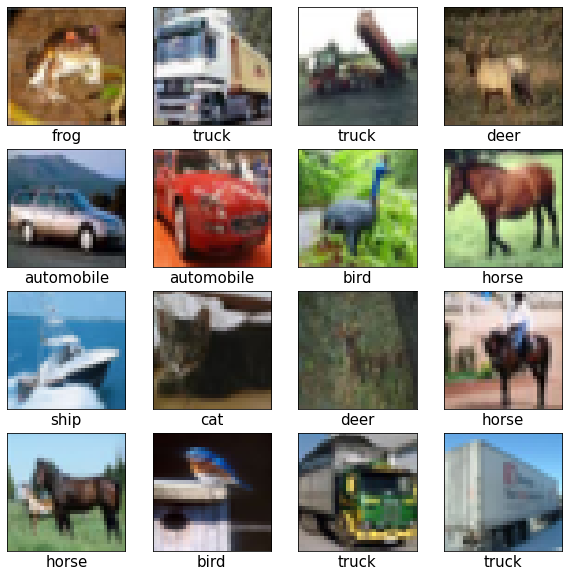

In [3]:
# Visualizando uma amostra dos dados
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)

    plt.xlabel(class_names[train_labels[i][0]], fontsize=15)
plt.show()

In [4]:
model = models.Sequential(name='CNN-CIFAR10')
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "CNN-CIFAR10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              

# Etapa III - Projeto II - Aplicação de Métodos de Aprendizagem de Máquina

In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 93s 59ms/step - loss: 1.5301 - accuracy: 0.4427 - val_loss: 1.2305 - val_accuracy: 0.5554
Epoch 2/10
1563/1563 [==============================] - 101s 65ms/step - loss: 1.1441 - accuracy: 0.5946 - val_loss: 1.0602 - val_accuracy: 0.6228
Epoch 3/10
1563/1563 [==============================] - 88s 56ms/step - loss: 0.9890 - accuracy: 0.6530 - val_loss: 1.0181 - val_accuracy: 0.6464
Epoch 4/10
1563/1563 [==============================] - 84s 54ms/step - loss: 0.8932 - accuracy: 0.6877 - val_loss: 0.9530 - val_accuracy: 0.6669
Epoch 5/10
1563/1563 [==============================] - 84s 54ms/step - loss: 0.8273 - accuracy: 0.7100 - val_loss: 0.8819 - val_accuracy: 0.6950
Epoch 6/10
1563/1563 [==============================] - 83s 53ms/step - loss: 0.7674 - accuracy: 0.7329 - val_loss: 0.9082 - val_accuracy: 0.6895
Epoch 7/10
1563/1563 [==============================] - 84s 54ms/step - loss: 0.7198 - accuracy: 0.7497 - val_loss: 0.8844 

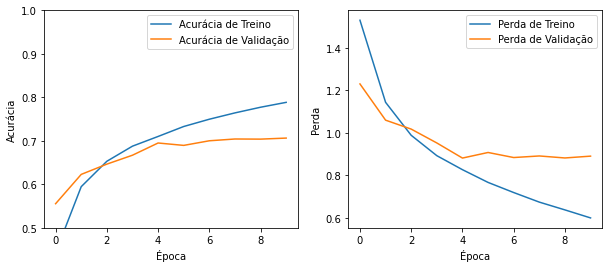

In [6]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Acurácia de Treino')
plt.plot(history.history['val_accuracy'], label = 'Acurácia de Validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.ylim([0.5, 1])
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Perda de Treino')
plt.plot(history.history['val_loss'], label = 'Perda de Validação')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend(loc='upper right')

plt.show()

In [7]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i][0], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i][0]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

313/313 [==============================] - 8s 24ms/step


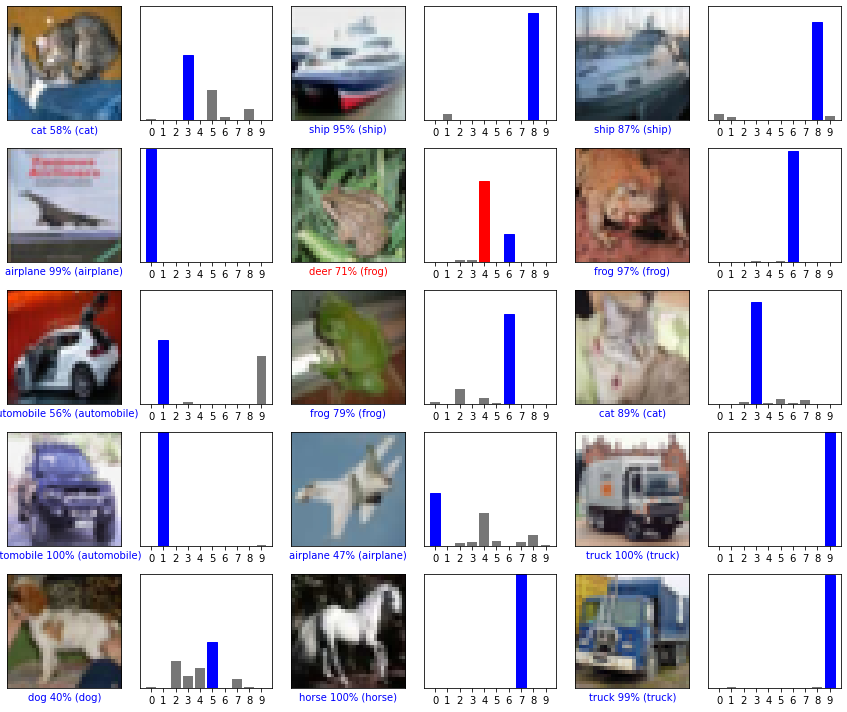

In [8]:
# Previsões corretas são marcadas em azul, erradas em vermelho
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()